In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [47]:
data=pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP -Skillcraft\archive (7)\cleaned.csv")

In [49]:
print(data.head())


  Age_band_of_driver Sex_of_driver   Educational_level  \
0              18-30          Male   Above high school   
1              31-50          Male  Junior high school   
2              18-30          Male  Junior high school   
3              18-30          Male  Junior high school   
4              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience   Lanes_or_Medians  \
0                Employee              1-2yr            Unknown   
1                Employee         Above 10yr  Undivided Two way   
2                Employee              1-2yr              other   
3                Employee             5-10yr              other   
4                Employee              2-5yr              other   

  Types_of_Junction Road_surface_type       Light_conditions  \
0       No junction     Asphalt roads               Daylight   
1       No junction     Asphalt roads               Daylight   
2       No junction     Asphalt roads               Dayl

In [51]:
print(data.columns)

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_1464\1936757535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index[:10], y=weather_counts.values[:10], palette='viridis')  # Top 10 conditions


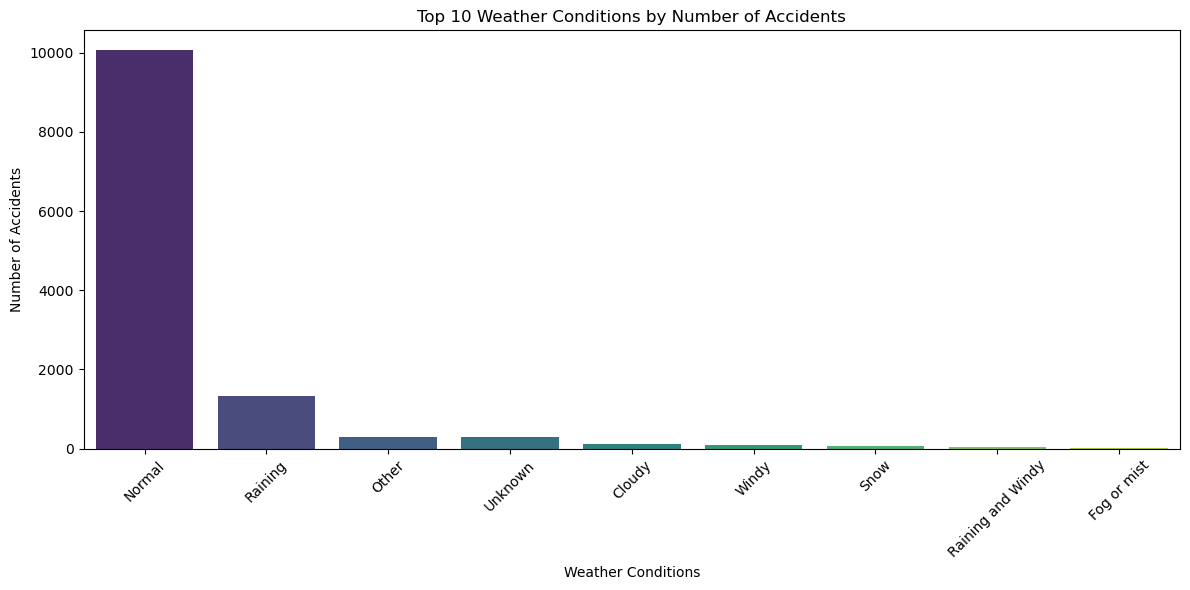

In [53]:
if 'Weather_conditions' in data.columns:
    weather_counts = data['Weather_conditions'].value_counts()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=weather_counts.index[:10], y=weather_counts.values[:10], palette='viridis')  # Top 10 conditions
    plt.xlabel('Weather Conditions')
    plt.ylabel('Number of Accidents')
    plt.title('Top 10 Weather Conditions by Number of Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Weather_conditions' not found.")


C:\Users\HP\AppData\Local\Temp\ipykernel_1464\1425567873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')


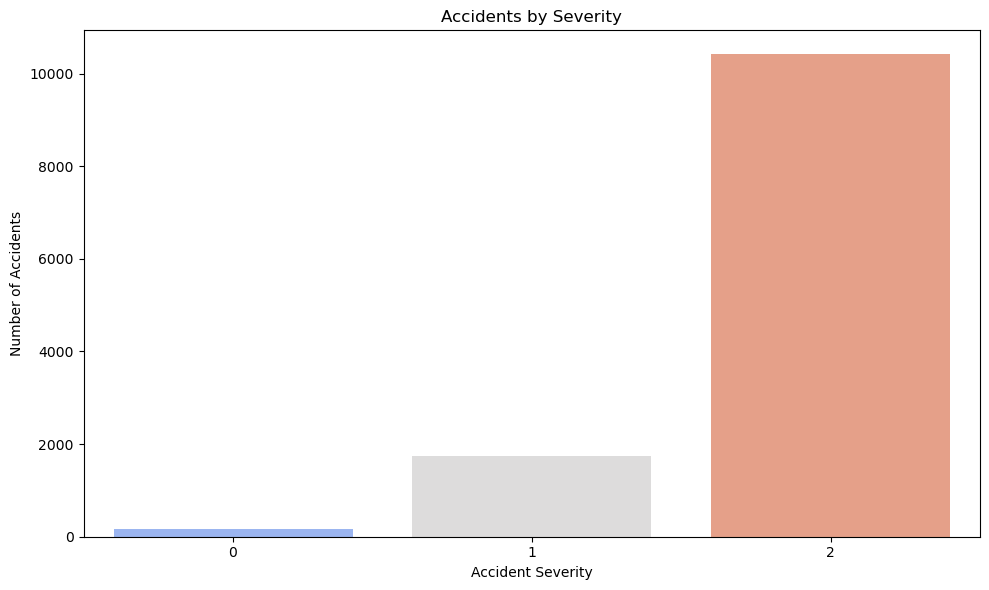

In [55]:
# Plot Hourly Accidents Analysis
if 'Accident_severity' in data.columns and 'Light_conditions' in data.columns:
    # Example: Accident Severity Analysis (Optional Customization)
    severity_counts = data['Accident_severity'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
    plt.xlabel('Accident Severity')
    plt.ylabel('Number of Accidents')
    plt.title('Accidents by Severity')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Accident_severity' or 'Light_conditions' not found.")